In [419]:
# import torch
# from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

In [420]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [421]:
data = pd.read_csv("/content/drive/My Drive/dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [422]:
data.shape

(70692, 22)

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [424]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [425]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [426]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

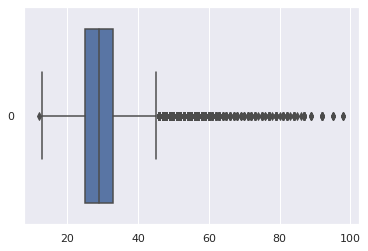

In [427]:
sns.boxplot(data=data['BMI'],orient="h")

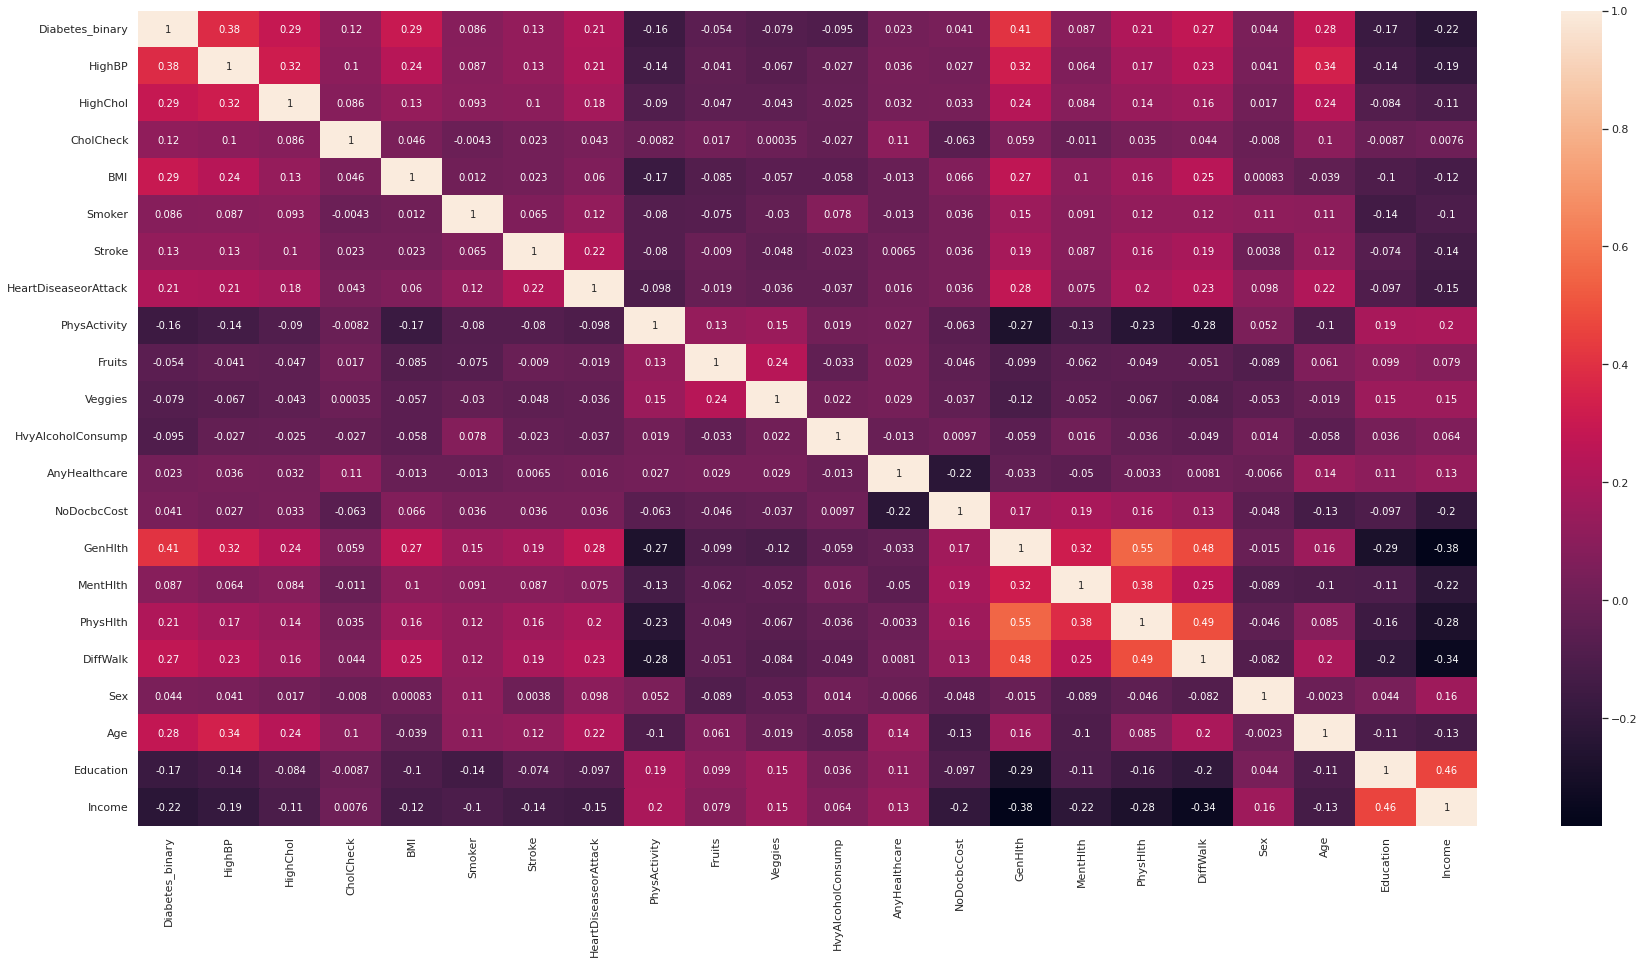

In [428]:
corr_matrix = data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

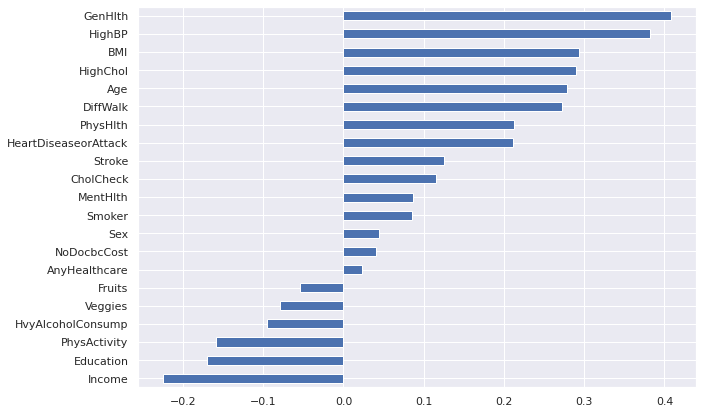

In [429]:
corr_with_class=data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).sort_values()
corr_with_class.plot(kind='barh', figsize=(10, 7))

#Outliers analysis

detection

In [430]:
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

removal of outliers

In [431]:
# data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data1.shape

# Dropping Duplicates

In [432]:
# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)

# Normalization

In [433]:
feature_names=data.columns
feature_names=feature_names.values
feature_names=np.delete(feature_names,0)
feature_names

array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [434]:
type(feature_names)

numpy.ndarray

In [435]:
for feature_name in feature_names:
    data[feature_name] = (data[feature_name]- data[feature_name].mean()) / data[feature_name].std()
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.857913,-1.071525,0.161802,-0.560349,-0.972573,-0.263093,-0.425060,0.667540,-1.228978,...,0.221754,-0.329227,0.107098,0.132094,2.349838,-0.597303,1.093183,-1.611991,1.081874,1.094472
1,0.0,0.857913,0.933236,0.161802,-0.560349,1.028185,3.800876,-0.425060,-1.498017,0.813672,...,0.221754,-0.329227,0.107098,-0.471307,-0.592965,-0.597303,1.093183,1.182696,1.081874,1.094472
2,0.0,-1.165603,-1.071525,0.161802,-0.560349,-0.972573,-0.263093,-0.425060,0.667540,0.813672,...,0.221754,-0.329227,-1.702897,-0.471307,0.387970,-0.597303,1.093183,1.532032,1.081874,1.094472
3,0.0,0.857913,0.933236,0.161802,-0.281634,1.028185,-0.263093,-0.425060,0.667540,0.813672,...,0.221754,-0.329227,0.107098,-0.471307,-0.298684,-0.597303,1.093183,0.833360,1.081874,1.094472
5,0.0,-1.165603,-1.071525,0.161802,-1.675209,-0.972573,-0.263093,-0.425060,0.667540,0.813672,...,-4.509437,-0.329227,-0.797900,0.373455,-0.592965,-0.597303,-0.914747,-2.659998,-0.860509,0.634960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,-1.165603,0.933236,0.161802,0.972584,-0.972573,-0.263093,-0.425060,-1.498017,-1.228978,...,0.221754,-0.329227,1.012095,-0.471307,-0.592965,-0.597303,-0.914747,-0.913319,-0.860509,-2.122110
70688,1.0,-1.165603,0.933236,0.161802,-0.142276,1.028185,-0.263093,2.352577,-1.498017,0.813672,...,0.221754,-0.329227,-0.797900,-0.471307,-0.592965,1.674168,1.093183,0.484024,-1.831701,0.175448
70689,1.0,0.857913,0.933236,0.161802,-0.699707,-0.972573,-0.263093,2.352577,-1.498017,0.813672,...,0.221754,-0.329227,1.917093,1.338896,-0.592965,1.674168,-0.914747,1.532032,1.081874,-0.743575
70690,1.0,0.857913,0.933236,0.161802,-1.675209,-0.972573,-0.263093,-0.425060,-1.498017,-1.228978,...,0.221754,-0.329227,1.012095,-0.471307,-0.592965,1.674168,-0.914747,0.833360,-2.802893,-0.743575


In [436]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,67889.000000,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,...,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04,6.788900e+04
mean,0.513588,2.206172e-14,-1.756357e-13,-3.691084e-14,-1.092883e-14,9.809770e-15,-5.272705e-14,-9.892057e-14,6.990407e-14,-8.714275e-16,...,5.601459e-16,2.265275e-14,1.456792e-14,-1.389578e-14,2.669778e-14,-4.159775e-14,2.146157e-14,3.109653e-14,-5.807792e-14,5.728618e-14
std,0.499819,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.165603e+00,-1.071525e+00,-6.180317e+00,-2.511354e+00,-9.725732e-01,-2.630934e-01,-4.250595e-01,-1.498017e+00,-1.228978e+00,...,-4.509437e+00,-3.292267e-01,-1.702897e+00,-4.713066e-01,-5.929645e-01,-5.973029e-01,-9.147467e-01,-2.659998e+00,-3.774084e+00,-2.122110e+00
25%,0.000000,-1.165603e+00,-1.071525e+00,1.618016e-01,-6.997066e-01,-9.725732e-01,-2.630934e-01,-4.250595e-01,-1.498017e+00,-1.228978e+00,...,2.217539e-01,-3.292267e-01,-7.978999e-01,-4.713066e-01,-5.929645e-01,-5.973029e-01,-9.147467e-01,-5.639832e-01,-8.605093e-01,-7.435752e-01
50%,1.000000,8.579128e-01,9.332358e-01,1.618016e-01,-1.422765e-01,-9.725732e-01,-2.630934e-01,-4.250595e-01,6.675395e-01,8.136722e-01,...,2.217539e-01,-3.292267e-01,1.070976e-01,-4.713066e-01,-5.929645e-01,-5.973029e-01,-9.147467e-01,1.346885e-01,1.106823e-01,1.754482e-01
75%,1.000000,8.579128e-01,9.332358e-01,1.618016e-01,4.151536e-01,1.028185e+00,-2.630934e-01,-4.250595e-01,6.675395e-01,8.136722e-01,...,2.217539e-01,-3.292267e-01,1.012095e+00,-1.092661e-01,9.368933e-02,1.674168e+00,1.093183e+00,8.333601e-01,1.081874e+00,1.094472e+00
max,1.000000,8.579128e-01,9.332358e-01,1.618016e-01,9.473392e+00,1.028185e+00,3.800876e+00,2.352577e+00,6.675395e-01,8.136722e-01,...,2.217539e-01,3.037376e+00,1.917093e+00,3.149098e+00,2.349838e+00,1.674168e+00,1.093183e+00,1.532032e+00,1.081874e+00,1.094472e+00


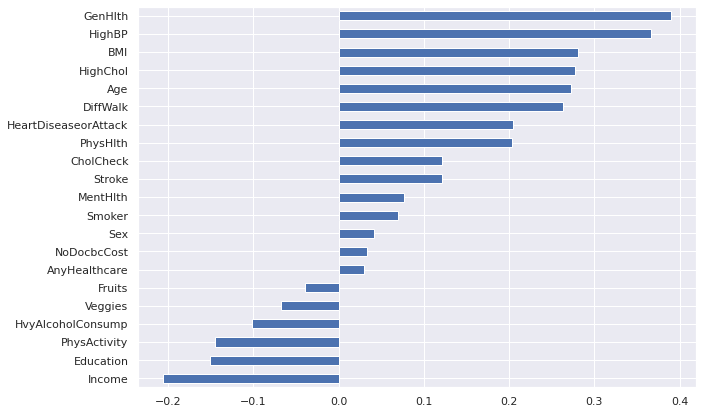

In [437]:
corr_with_class=data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).sort_values()
corr_with_class.plot(kind='barh', figsize=(10, 7))

<h1>Modelling</h1>

# logistic reggession

In [438]:
cols = list(data.columns)
cols.remove("Diabetes_binary")
sampled,target = SMOTE().fit_resample(data[cols],data["Diabetes_binary"])
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.1,
                                                 shuffle=True)

In [439]:
print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(Y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(Y_test))

Train Feature Size :  62760
Train Label Size :  62760
Test Feature Size :  6974
Test Label Size :  6974


In [440]:
data.shape

(67889, 22)

Train Accuracy : 74.03 %
Test Accuracy : 74.51 %


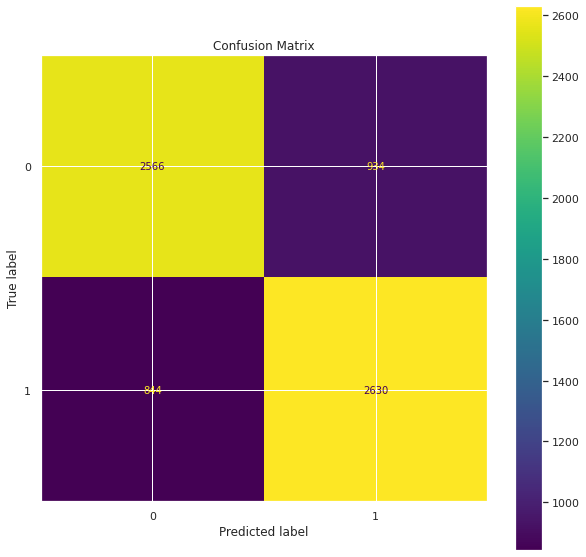

In [441]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
predicted=logistic_model.predict(X_test)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)*100))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)*100))

cm = confusion_matrix(Y_test,predicted)
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [442]:
print(classification_report(predicted, Y_test))
print("ACCURACY:",accuracy_score(Y_test, predicted))
print("RECALL:",recall_score(Y_test, predicted, average="binary"))

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      3410
         1.0       0.76      0.74      0.75      3564

    accuracy                           0.75      6974
   macro avg       0.75      0.75      0.75      6974
weighted avg       0.75      0.75      0.75      6974

ACCURACY: 0.7450530542013192
RECALL: 0.7570523891767416


# random forest


Train Accuracy : 99.24 %
Test Accuracy : 72.81 %


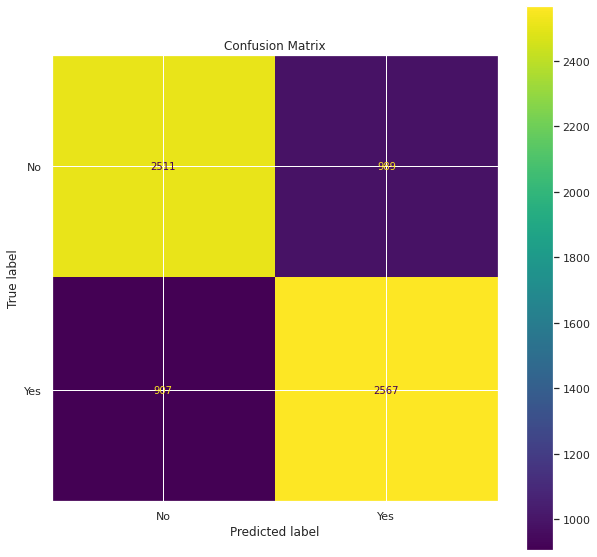

In [443]:
random_forest = RandomForestClassifier(n_estimators=20,
                                       random_state=0).fit(X_train,Y_train)
predicted=random_forest.predict(X_test)                                       
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)*100))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)*100))

cm = confusion_matrix(Y_test,predicted)
classes = ["No","Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [444]:
print(classification_report(predicted, Y_test))
print("ACCURACY:",accuracy_score(Y_test, predicted))
print("RECALL:",recall_score(Y_test, predicted, average="binary"))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.73      3418
         1.0       0.74      0.72      0.73      3556

    accuracy                           0.73      6974
   macro avg       0.73      0.73      0.73      6974
weighted avg       0.73      0.73      0.73      6974

ACCURACY: 0.7281330656724978
RECALL: 0.7389176741508348


# KNN

In [445]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=15)

In [446]:
y_pred = knn.predict(X_test)

In [447]:
y_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [448]:
data['Diabetes_binary'].value_counts()

1.0    34867
0.0    33022
Name: Diabetes_binary, dtype: int64

In [449]:
print(confusion_matrix(Y_test,y_pred))

[[2457 1043]
 [ 833 2641]]


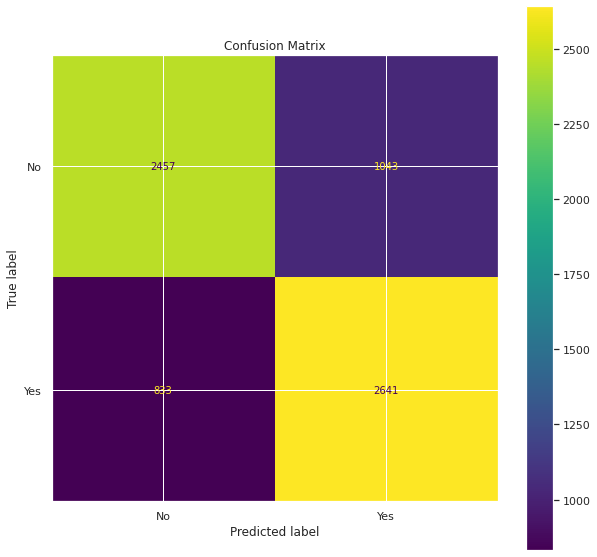

In [450]:

cm = confusion_matrix(Y_test,y_pred)
classes = ["No","Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [451]:
print(classification_report(Y_test,y_pred))
print("ACCURACY:",accuracy_score(Y_test, predicted))
print("RECALL:",recall_score(Y_test, predicted, average="binary"))

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      3500
         1.0       0.72      0.76      0.74      3474

    accuracy                           0.73      6974
   macro avg       0.73      0.73      0.73      6974
weighted avg       0.73      0.73      0.73      6974

ACCURACY: 0.7281330656724978
RECALL: 0.7389176741508348


In [452]:
# Running KNN for various values of n_neighbors and storing results
# knn_r_acc = []
# for i in range(1,17,1):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,Y_train)
#     test_score = knn.score(X_test,Y_test)
#     train_score = knn.score(X_train,Y_train)
#     knn_r_acc.append((i, test_score ,train_score))
# df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
# print(df)

#k=15 found the for the best result
#outcome:
#      K  Test Score  Train Score
# 0    1    0.659855     0.996558
# 1    2    0.639277     0.824081
# 2    3    0.680003     0.830821
# 3    4    0.668674     0.791421
# 4    5    0.691403     0.793447
# 5    6    0.686241     0.777278
# 6    7    0.701728     0.779357
# 7    8    0.698717     0.768494
# 8    9    0.709472     0.769373
# 9   10    0.705815     0.761970
# 10  11    0.712698     0.763601
# 11  12    0.711981     0.758008
# 12  13    0.716211     0.759281
# 13  14    0.715781     0.754692
# 14  15    0.720083     0.754782
# 15  16    0.719796     0.751519

# Feature importance

In [453]:
importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'score': random_forest.feature_importances_
}).sort_values('score', ascending=False)

importance_rf.head(10)

,feature,score
3,BMI,0.171667
18,Age,0.125079
13,GenHlth,0.103410
20,Income,0.085958
0,HighBP,0.069433
15,PhysHlth,0.068774
19,Education,0.059116
14,MentHlth,0.053574
1,HighChol,0.041222
4,Smoker,0.029527


[Text(0, 0.5, 'Feature'), Text(0.5, 0, 'Score')]

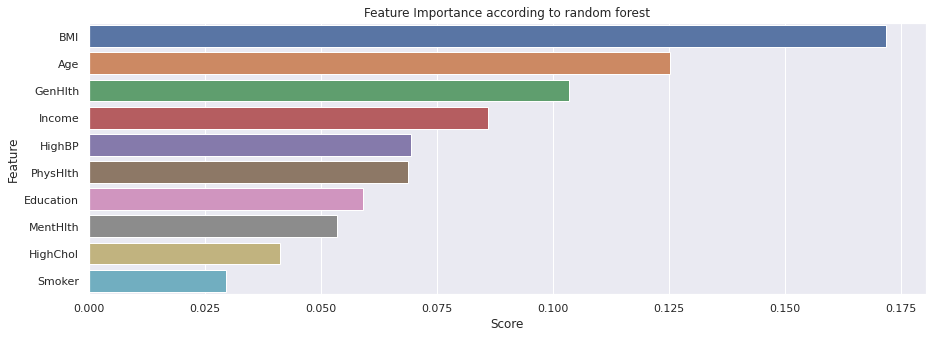

In [454]:
# Income, Education, PhysActivity --> Negative correlation
# GenHlth, HighBP, DiffWalk,BMI --> Positive correlation
plt.figure(figsize = (15,5))
sns.set(font_scale = 1)
plt.title('Feature Importance according to random forest')
ax = sns.barplot(data=importance_rf.head(10), x='score', y='feature')
ax.set(xlabel='Score', ylabel='Feature')

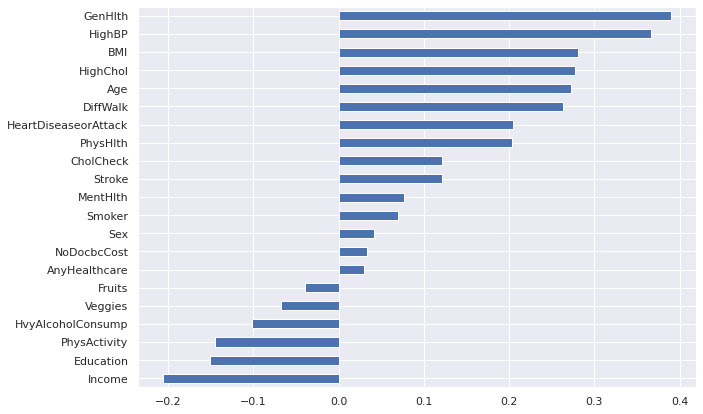

In [455]:
corr_with_class.plot(kind='barh', figsize=(10, 7))

In [456]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [457]:
data.shape

(67889, 22)

In [458]:
#i want to leave that attributes: BMI,  Age,  GenHlth,  Income , PhysHlth and of course the class attribute

#these 11 attributes almost no effect on the modelling algorithms so i dropped them
data.drop(['CholCheck'],axis=1,inplace=True)
data.drop(['Smoker'],axis=1,inplace=True)
data.drop(['Stroke'],axis=1,inplace=True)
data.drop(['HeartDiseaseorAttack'],axis=1,inplace=True)
data.drop(['PhysActivity'],axis=1,inplace=True)
data.drop(['Fruits'],axis=1,inplace=True)
data.drop(['Veggies'],axis=1,inplace=True)
data.drop(['Sex'],axis=1,inplace=True)
data.drop(['HvyAlcoholConsump'],axis=1,inplace=True)
data.drop(['AnyHealthcare'],axis=1,inplace=True)
data.drop(['NoDocbcCost'],axis=1,inplace=True)

#these 5 attributes are kinda effective but I am choosing to drop them to increase user experience.
data.drop(['DiffWalk'],axis=1,inplace=True)
data.drop(['HighChol'],axis=1,inplace=True)
data.drop(['MentHlth'],axis=1,inplace=True)
data.drop(['Education'],axis=1,inplace=True)
# data.drop(['HighBP'],axis=1,inplace=True)
# data.drop(['PhysHlth'],axis=1,inplace=True)

data.shape



(67889, 7)

# Retesting the best model with these attributes

In [459]:
cols = list(data.columns)
cols.remove("Diabetes_binary")
sampled,target = SMOTE().fit_resample(data[cols],data["Diabetes_binary"])
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.1,
                                                 shuffle=True)

In [460]:
print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(Y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(Y_test))

Train Feature Size :  62760
Train Label Size :  62760
Test Feature Size :  6974
Test Label Size :  6974


In [461]:
data.shape

(67889, 7)

Train Accuracy : 73.17 %
Test Accuracy : 72.40 %


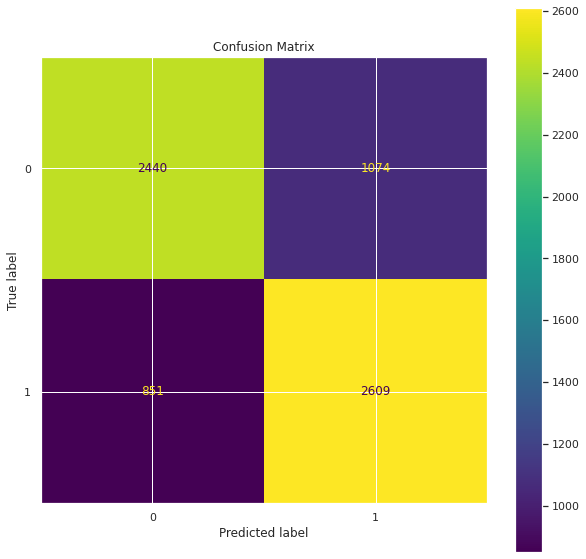

In [462]:
logistic_model = LogisticRegression(solver='liblinear').fit(X_train,Y_train)
predicted=logistic_model.predict(X_test)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)*100))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)*100))

cm = confusion_matrix(Y_test,predicted)
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [463]:
print(classification_report(predicted, Y_test))
print("ACCURACY:",accuracy_score(Y_test, predicted))
print("RECALL:",recall_score(Y_test, predicted, average="binary"))

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72      3291
         1.0       0.75      0.71      0.73      3683

    accuracy                           0.72      6974
   macro avg       0.72      0.72      0.72      6974
weighted avg       0.73      0.72      0.72      6974

ACCURACY: 0.7239747634069401
RECALL: 0.7540462427745664
